In [37]:
#Importing Necessary Libraries and Checking out input data
import pandas
import os
import cv2
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator,array_to_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,BatchNormalization,MaxPooling2D,Activation
from sklearn.metrics import classification_report
from IPython.display import Image, display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
print(os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/"))



['train', 'val', '.DS_Store', 'test']


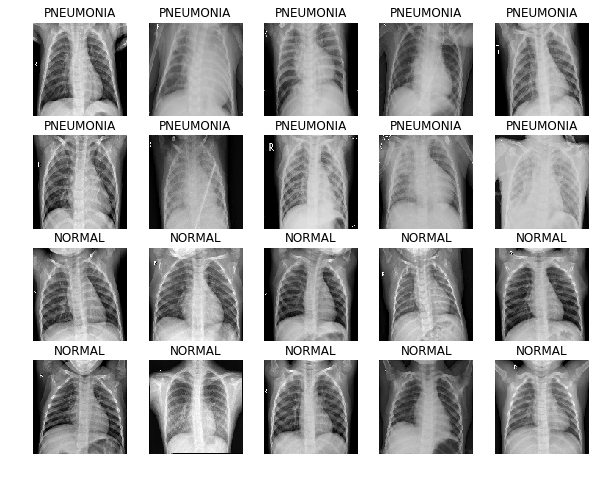

In [6]:
#Analysing Data and getting insights.
#Displaying images from both classes
train_pneum=os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA")
train_pneum=list(map(lambda x: "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/" + x ,train_pneum))
i = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
for l in train_pneum[:10]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i+1).set_title("PNEUMONIA")
    plt.imshow(im); plt.axis('off')
    i = i + 1
train_normal=os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL")
train_normal=list(map(lambda x: "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/" + x ,train_normal))
for l in train_normal[:10]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i+1).set_title("NORMAL")
    plt.imshow(im); plt.axis('off')
    i = i + 1

In [7]:
#Analysing Data in train dataset
print("Total number of images in train dataset: " + str(len(train_pneum) + len(train_normal)))
print("Number of xrays containing pneumonia in train dataset " + str(len(train_pneum)))
print("Number of xrays not containing pneumonia in train dataset " + str(len(train_normal)))

Total number of images in train dataset: 5218
Number of xrays containing pneumonia in train dataset 3876
Number of xrays not containing pneumonia in train dataset 1342


In [8]:
#Analysing and preparing test and Validation data
test_pneum=os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA")
test_norm=os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL")
val_pneum=os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA")
val_norm=os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL")
print("Total number of images in test dataset: " + str(len(test_pneum) + len(test_norm) ))
print("Number of xrays containing pneumonia in test dataset " + str(len(test_pneum)))
print("Number of xrays not containing pneumonia in test dataset " + str(len(test_norm)))



Total number of images in test dataset: 624
Number of xrays containing pneumonia in test dataset 390
Number of xrays not containing pneumonia in test dataset 234


In [9]:
#Initialising ImageDataGenerator
Image_gen=ImageDataGenerator(rescale=1/255)
#Preparing train data
traindata_gen=Image_gen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/chest_xray/train',target_size=[300,300],batch_size=64,class_mode='binary',shuffle=True)
#Preparing test data
testdata_gen=Image_gen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/chest_xray/test',target_size=[300,300],batch_size=64,class_mode='binary',shuffle=True)
#Preparing Validation data
validation_gen=Image_gen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/chest_xray/val',target_size=[300,300],batch_size=64,class_mode='binary',shuffle=True)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [10]:
#Stops training when train and validation accuracy reaches 95%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.95 and logs.get('acc')> 0.95):
      print("\n achieved 90% accuracy on test data so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

In [11]:
model=Sequential([
    Conv2D(16,(3,3),input_shape=[300,300,3],activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [12]:
#compiling model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])


In [13]:
#fitting model
history=model.fit_generator(traindata_gen,epochs=5,validation_data=validation_gen,steps_per_epoch=82,validation_steps=1,callbacks=[callbacks])

Epoch 1/5
82/82 [==============================] - 74s 906ms/step - loss: 0.3987 - acc: 0.8372 - val_loss: 1.0286 - val_acc: 0.6250
Epoch 2/5
82/82 [==============================] - 69s 837ms/step - loss: 0.1155 - acc: 0.9563 - val_loss: 0.4114 - val_acc: 0.8125
Epoch 3/5
82/82 [==============================] - 69s 842ms/step - loss: 0.0819 - acc: 0.9705 - val_loss: 0.8690 - val_acc: 0.6250
Epoch 4/5
82/82 [==============================] - 69s 847ms/step - loss: 0.0849 - acc: 0.9691 - val_loss: 0.1526 - val_acc: 0.9375
Epoch 5/5
81/82 [============================>.] - ETA: 0s - loss: 0.0687 - acc: 0.9746
 achieved 90% accuracy on test data so cancelling training!
82/82 [==============================] - 69s 838ms/step - loss: 0.0694 - acc: 0.9747 - val_loss: 0.1276 - val_acc: 1.0000


In [36]:
#Summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       7

In [15]:
#Evaluating accuracy of model
scores = model.evaluate_generator(testdata_gen,624) #624 testing images
print("Accuracy on test model  = ", scores[1])

Accuracy =  0.8060805


In [17]:
#Predictions for test data
predictions=model.predict_generator(testdata_gen)
predictions=predictions.round()

In [21]:
#Classification report
y_true = np.array([0] * 234 + [1] * 390)
target_names=["NORMAL","PNEUMONIA"]
print(classification_report(y_true, predictions, target_names=target_names))

              precision    recall  f1-score   support

      NORMAL       0.31      0.17      0.22       234
   PNEUMONIA       0.61      0.78      0.68       390

    accuracy                           0.55       624
   macro avg       0.46      0.47      0.45       624
weighted avg       0.50      0.55      0.51       624



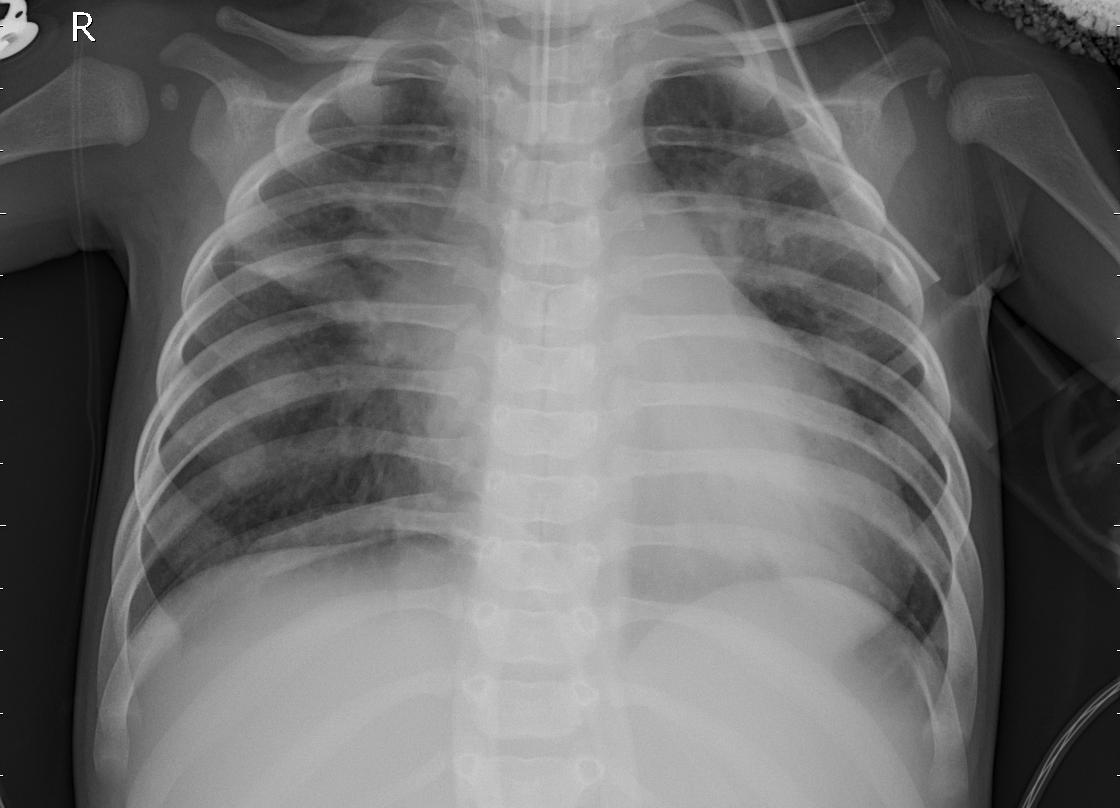

array([[1]], dtype=int32)

In [32]:
#Testing model with a pneumonia sample
image_path="../input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg"
img1=load_img(image_path,target_size=[300,300])
k1=img_to_array(img1)
k1 = k1.reshape((1,k1.shape[0], k1.shape[1],k1.shape[2]))
display(Image(image_path,width=150, height=150))
model.predict_classes(k1)

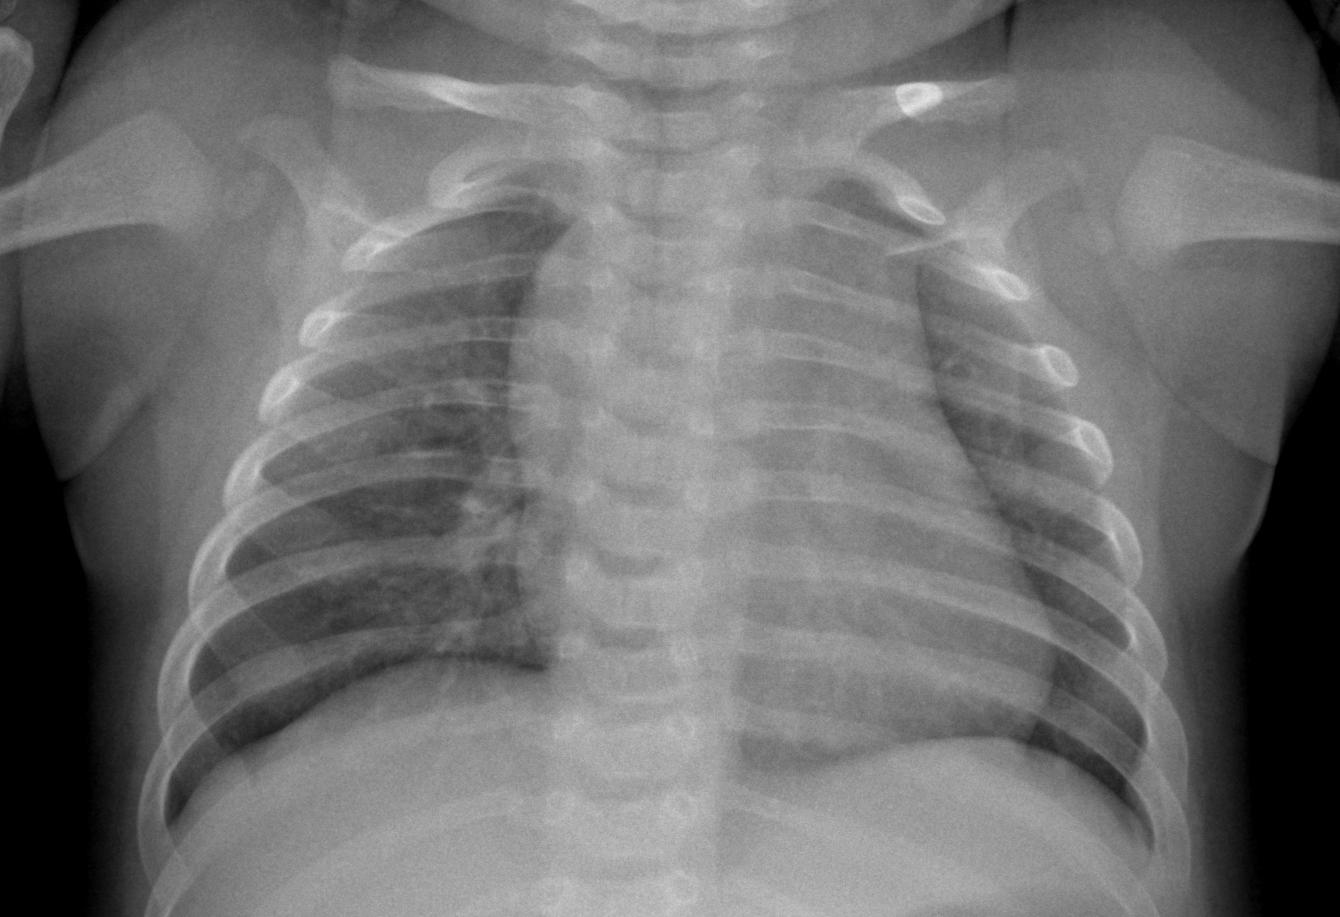

array([[0]], dtype=int32)

In [33]:
#Testing model with Normal Sample
image_path="../input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0272-0001.jpeg"
img1=load_img(image_path,target_size=[300,300])
k1=img_to_array(img1)
k1 = k1.reshape((1,k1.shape[0], k1.shape[1],k1.shape[2]))
display(Image(image_path,width=150, height=150))
model.predict_classes(k1)